Import all necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler 
import math
from deepchecks.tabular.datasets.classification import adult 
from deepchecks.tabular.checks.data_integrity import FeatureFeatureCorrelation 
from sklearn.metrics import mean_absolute_error as mae
from sklearn.svm import SVC, LinearSVC, SVR
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import skew
import warnings
warnings.filterwarnings('ignore')
import pickle
from sklearn.model_selection import cross_val_score


deepchecks - WARNING - You are using deepchecks version 0.14.0, however a newer version is available.Deepchecks is frequently updated with major improvements. You should consider upgrading via the "python -m pip install --upgrade deepchecks" command.


Load the dataset

In [3]:
data=pd.read_csv('data_car.csv')

In [4]:
# to show full columns
pd.set_option('display.max_columns', None)

In [5]:
data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


EDA

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [8]:
data.shape

(11914, 16)

In [7]:
print(f"Duplicates: {data.duplicated().sum()}")
duplicate = data[data.duplicated()]
print("Duplicate Rows :")
# Print the resultant rows
duplicate

Duplicates: 715
Duplicate Rows :


,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
14,BMW,1 Series,2013,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,19,3916,31500
18,Audi,100,1992,regular unleaded,172.0,6.0,MANUAL,front wheel drive,4.0,Luxury,Midsize,Sedan,24,17,3105,2000
20,Audi,100,1992,regular unleaded,172.0,6.0,MANUAL,front wheel drive,4.0,Luxury,Midsize,Sedan,24,17,3105,2000
24,Audi,100,1993,regular unleaded,172.0,6.0,MANUAL,front wheel drive,4.0,Luxury,Midsize,Sedan,24,17,3105,2000
25,Audi,100,1993,regular unleaded,172.0,6.0,MANUAL,front wheel drive,4.0,Luxury,Midsize,Sedan,24,17,3105,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11481,Suzuki,X-90,1998,regular unleaded,95.0,4.0,MANUAL,four wheel drive,2.0,NaN,Compact,2dr SUV,26,22,481,2000
11603,Volvo,XC60,2017,regular unleaded,302.0,4.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Luxury,Performance",Midsize,4dr SUV,29,20,870,46350
11604,Volvo,XC60,2017,regular unleaded,240.0,4.0,AUTOMATIC,front wheel drive,4.0,"Crossover,Luxury",Midsize,4dr SUV,30,23,870,40950
11708,Suzuki,XL7,2008,regular unleaded,252.0,6.0,AUTOMATIC,all wheel drive,4.0,Crossover,Midsize,4dr SUV,22,15,481,29149


In [9]:
#to check the null values
data.isna().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [10]:
#statistics of data
data.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [11]:
data.nunique()

Make                   48
Model                 915
Year                   28
Engine Fuel Type       10
Engine HP             356
Engine Cylinders        9
Transmission Type       5
Driven_Wheels           4
Number of Doors         3
Market Category        71
Vehicle Size            3
Vehicle Style          16
highway MPG            59
city mpg               69
Popularity             48
MSRP                 6049
dtype: int64

In [14]:
data.MSRP.value_counts()

2000     1036
29995      19
25995      19
20995      16
27995      16
         ... 
18855       1
22575       1
20050       1
26965       1
50920       1
Name: MSRP, Length: 6049, dtype: int64

<Axes: ylabel='Type'>

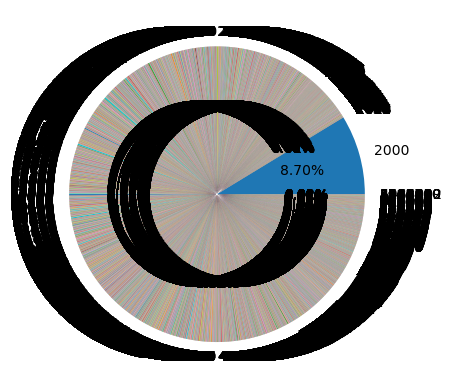

In [16]:
data.groupby('MSRP').size().plot(kind='pie',y ='MSRP',label='Type',autopct='%1.2f%%')

In [17]:
data.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

ValueError: could not convert string to float: 'Coupe'

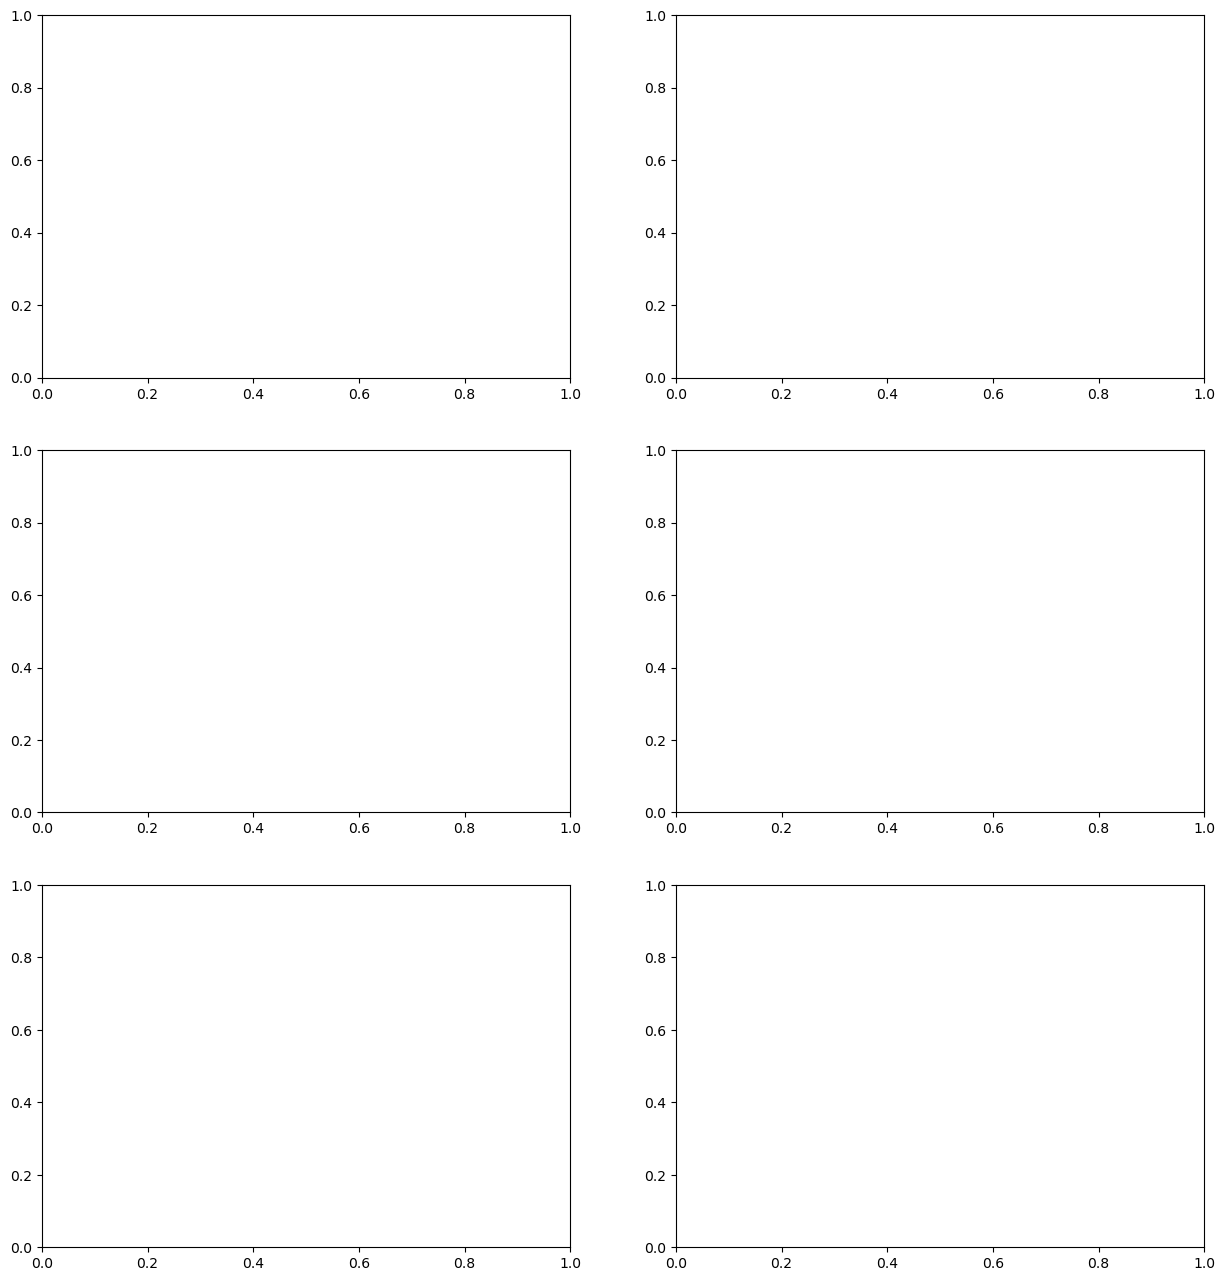

In [19]:
# univariate analysis of categorical columns
fig, ax = plt.subplots(3, 2, figsize = (15,16))
_=sns.countplot(data['Vehicle Style'], ax=ax[0,0],palette='Set2')
_=sns.countplot(data['Vehicle Size'], ax=ax[0,1], palette='Set2')
_=sns.countplot(data['Engine Fuel Type'], ax=ax[1,0], palette='Set2')
_=sns.countplot(data['Transmission Type'], ax=ax[1,1],palette='Set2')
_=sns.countplot(data['Driven_Wheels'], ax=ax[2,0], palette='Set2')


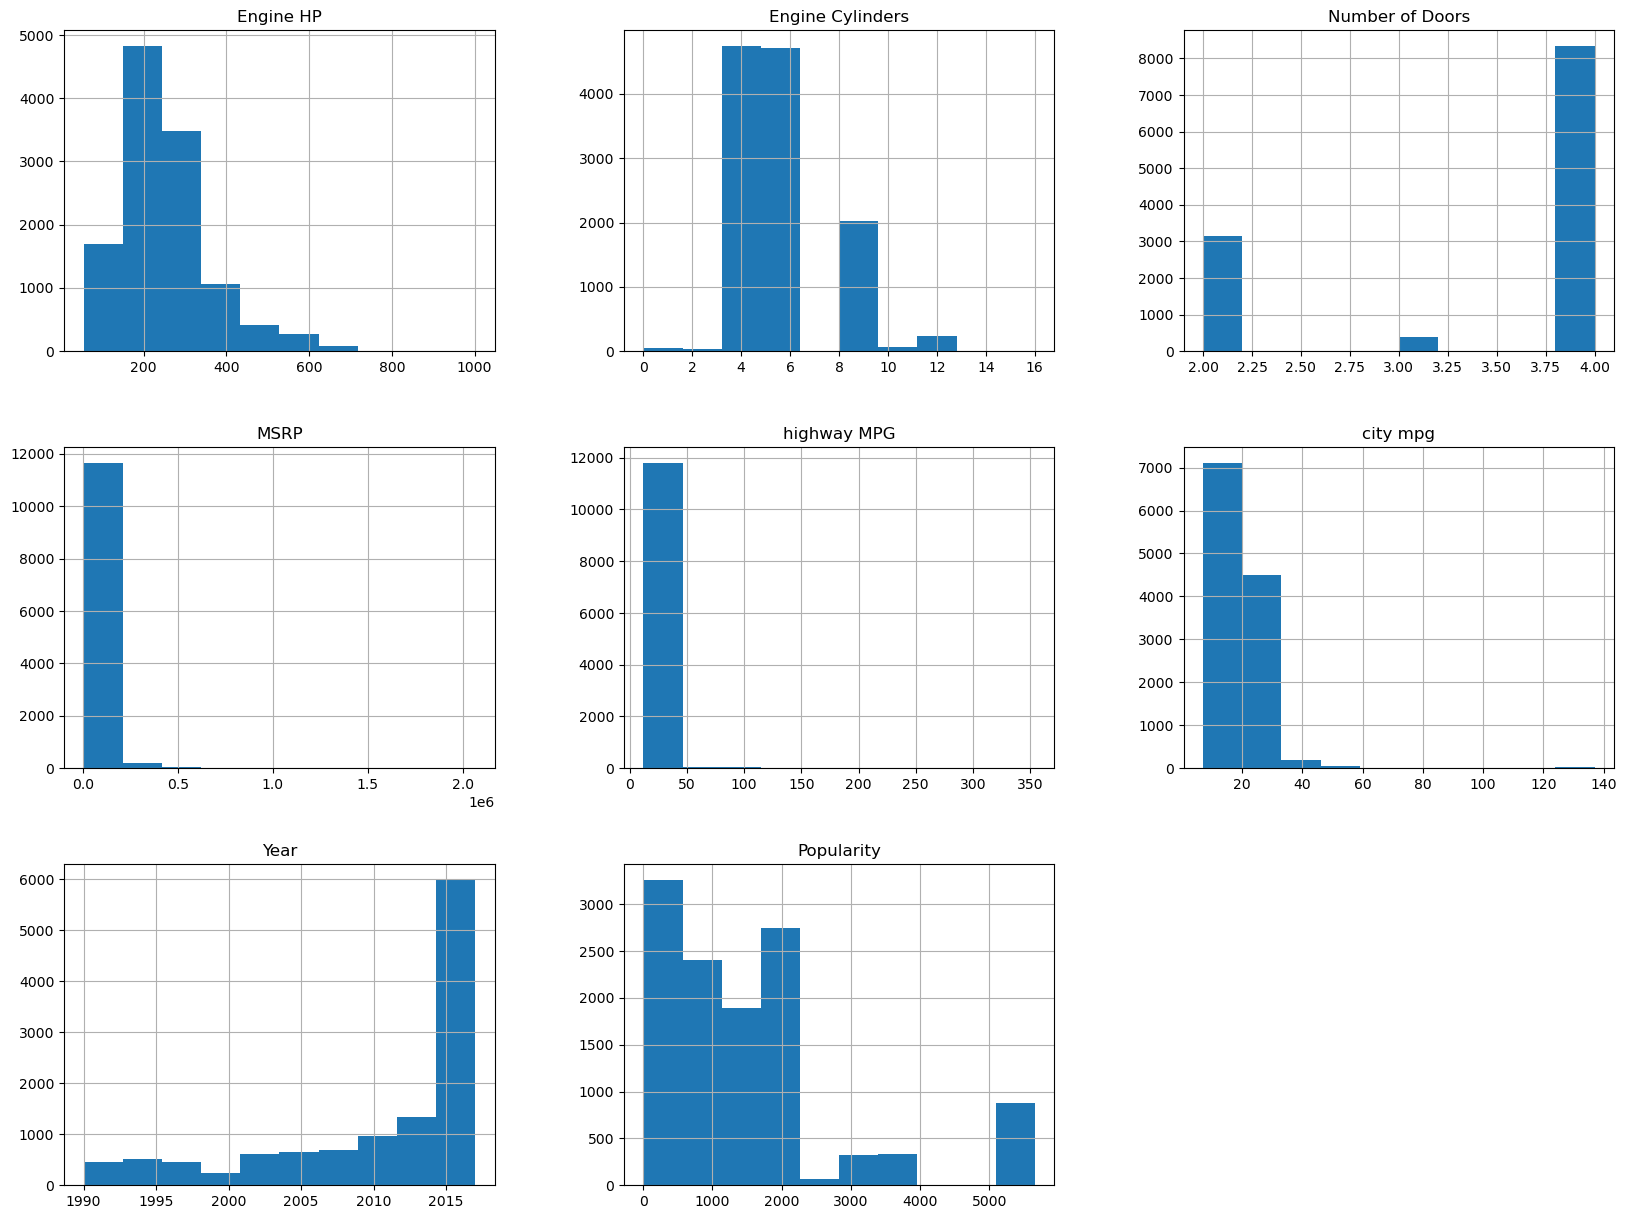

In [25]:
#univariate analysis of numerical columns 
data[['Engine HP','Engine Cylinders','Number of Doors','MSRP','highway MPG','city mpg','Year','Popularity']].hist(figsize=(20,15))
plt.show()

In [27]:
#Bivariate variables
data.groupby(by='MSRP').mean()[['Engine HP','Engine Cylinders','Number of Doors','highway MPG','city mpg','Year','Popularity']]

,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Year,Popularity
MSRP,,,,,,,
2000,144.717181,5.168919,2.971042,24.665058,18.217181,1993.44112,1434.521236
2002,120.000000,4.000000,4.000000,23.000000,19.000000,1997.00000,481.000000
2003,125.000000,4.000000,4.000000,34.000000,27.000000,2000.00000,1385.000000
2008,190.000000,6.000000,2.500000,19.500000,15.000000,1996.50000,1193.000000
2012,93.000000,4.000000,2.000000,35.000000,28.000000,1997.00000,2031.000000
...,...,...,...,...,...,...,...
1380000,620.000000,12.000000,4.000000,16.000000,10.000000,2011.00000,67.000000
1382750,620.000000,12.000000,4.000000,16.000000,10.000000,2012.00000,67.000000
1500000,825.500000,14.000000,2.000000,14.000000,8.500000,2008.00000,989.000000


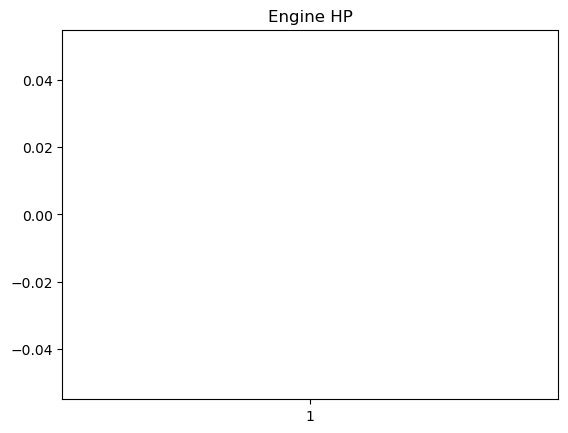

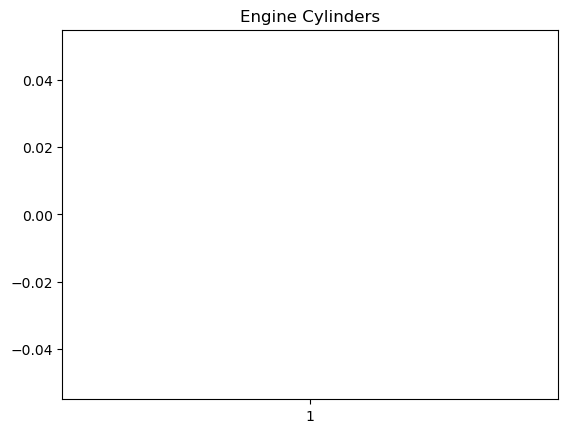

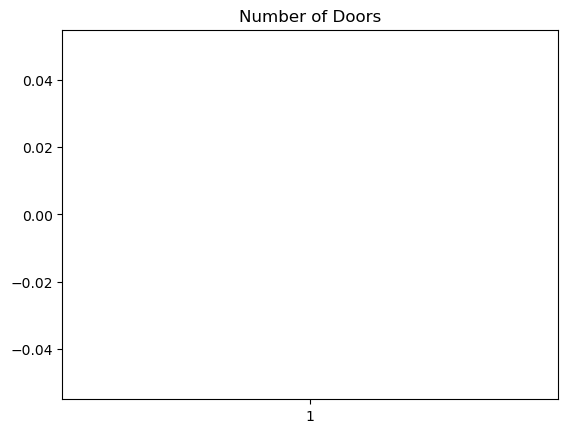

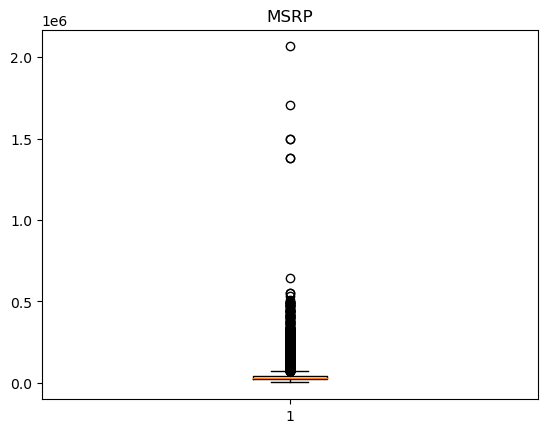

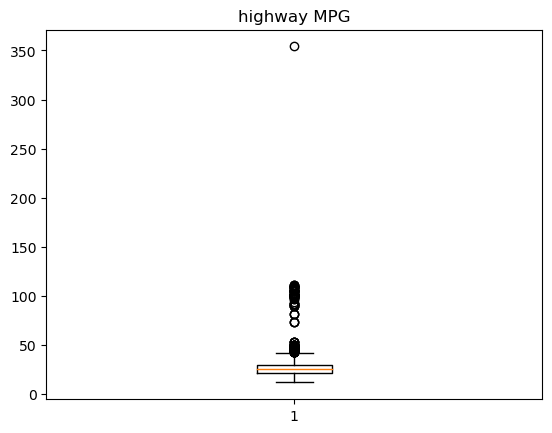

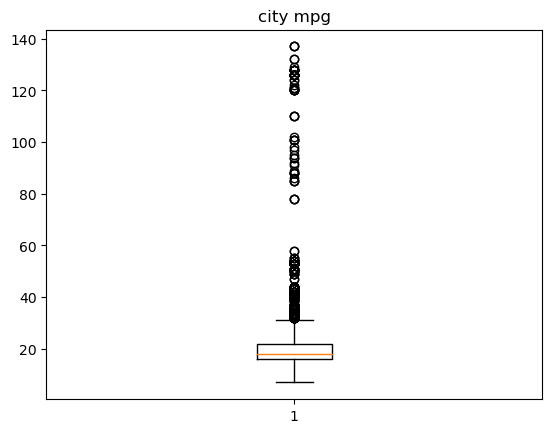

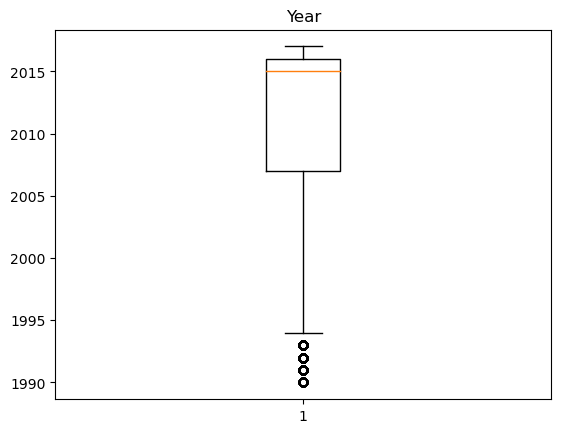

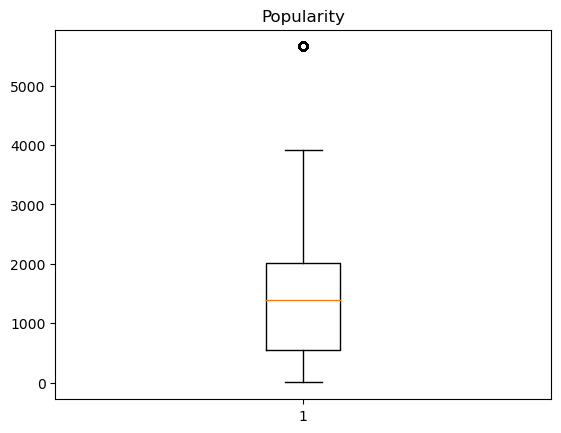

In [28]:
#Boxplot for numerical column
for i in ['Engine HP','Engine Cylinders','Number of Doors','MSRP','highway MPG','city mpg','Year','Popularity']:
    plt.figure()
    plt.boxplot(data[i])
    plt.title(i)

In [29]:
data.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

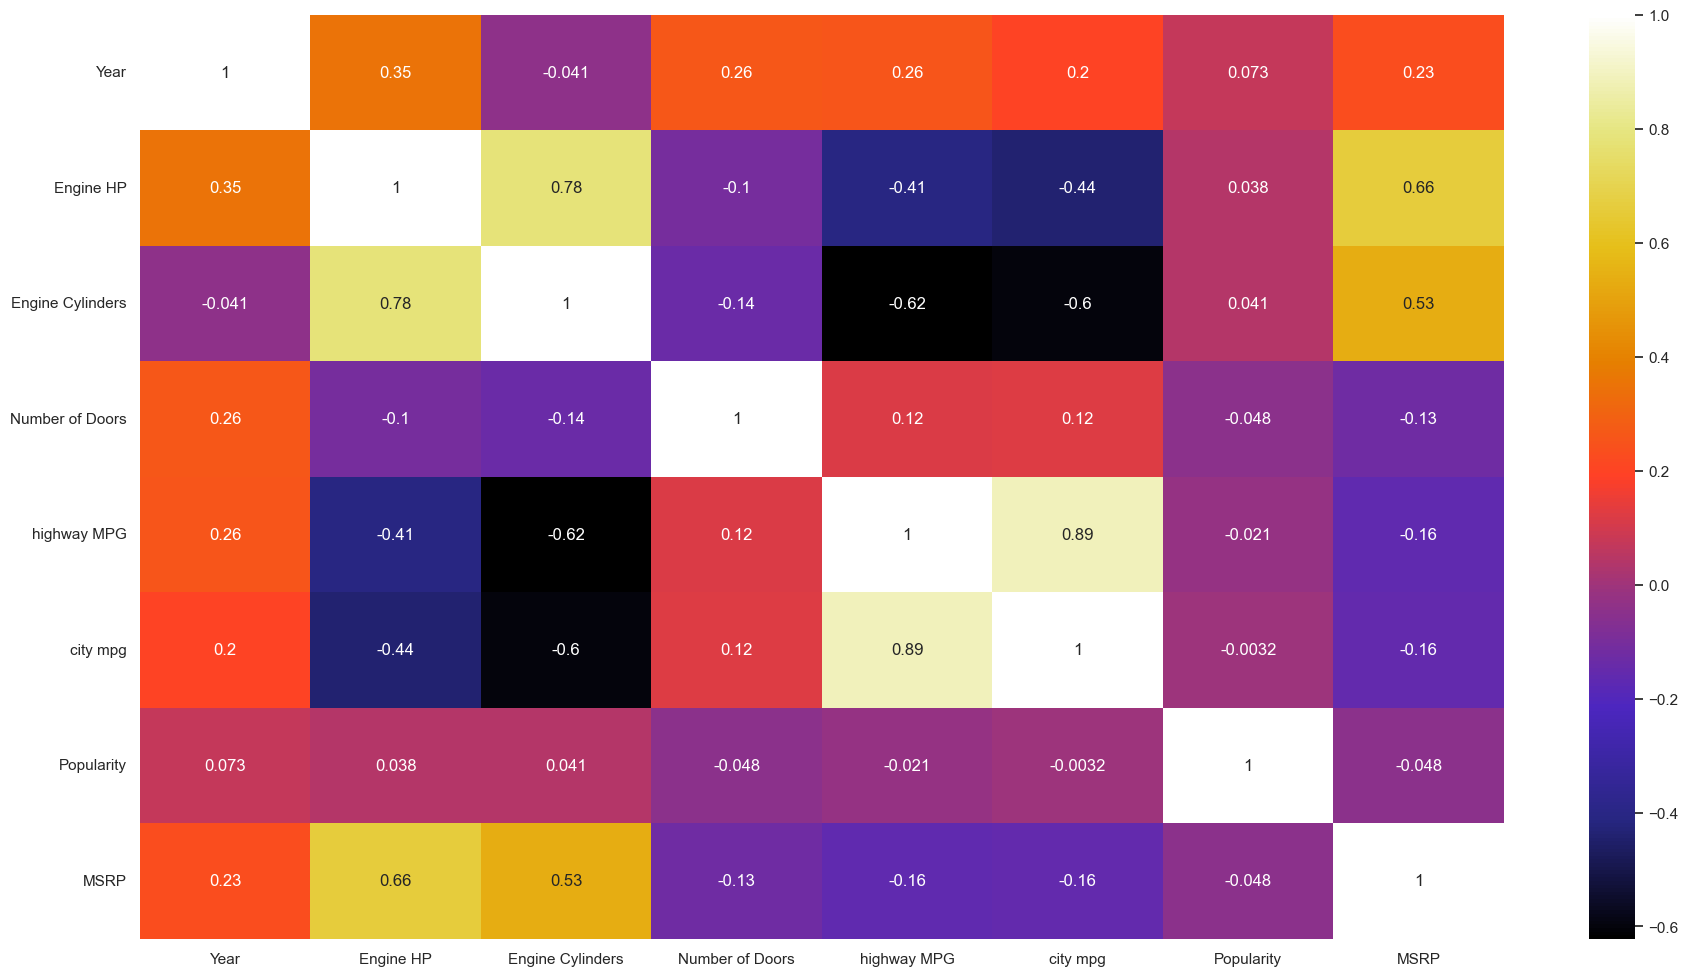

In [30]:
#Bivariate analysis 
#Correlation plot using heatmap
def plot_corr(data):
    corr = data.corr()
    sns.set_theme()
    plt.figure(figsize = (22,12))
    sns.heatmap(corr, cbar=True, annot=True, cmap='CMRmap')
plot_corr(data)

Data Preprocessing

In [31]:
#To remove all the duplicates

data.drop_duplicates(inplace=True, keep='first')

In [32]:
data.shape

(11199, 16)

In [35]:
# To replace null values -Engine HP,Engine Cylinders,Market Category,Engine Fuel Type,Number of Doors
data['Engine HP']=data['Engine HP'].fillna(data['Engine HP'].median())
data['Engine Cylinders']=data['Engine Cylinders'].fillna(data['Engine Cylinders'].median())
data['Market Category']=data['Market Category'].fillna(data['Market Category'].mode()[0])
data['Engine Fuel Type']=data['Engine Fuel Type'].fillna(data['Engine Fuel Type'].mode()[0])
data['Number of Doors']=data['Number of Doors'].fillna(data['Number of Doors'].median())

In [36]:
data.isna().sum()

Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Market Category      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64

In [39]:
data.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [45]:
#change the column names
new_column_names = {'Engine Fuel Type':'Engine_Fuel_Type','Engine HP':'Engine_HP','Engine Cylinders':'Engine_Cylinders','Transmission Type':'Transmission_Type','Number of Doors':'Number_of_Doors','Market Category':'Market_Category','Vehicle Size':'Vehicle_Size','Vehicle Style':'Vehicle_Style','highway MPG':'highway_MPG','city mpg':'city_mpg'}
data.rename(columns=new_column_names, inplace=True)

In [46]:
data.head()

,Make,Model,Year,Engine_Fuel_Type,Engine_HP,Engine_Cylinders,Transmission_Type,Driven_Wheels,Number_of_Doors,Market_Category,Vehicle_Size,Vehicle_Style,highway_MPG,city_mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [ ]:
#engine hp,no of door,engine cylinder continous variables-removal of outliers
#outliers-MSRP,highway,city mpg,year
#So no need to remove outliers

In [48]:
Q1 = data.Year.quantile(0.25)
Q3 = data.Year.quantile(0.75)
IQR = Q3 - Q1
min_limit = Q1 - (IQR * 1.5)
max_limit = Q3 + (IQR * 1.5)
print(min_limit, max_limit,IQR)

1993.5 2029.5 9.0


In [49]:
data.loc[data.Year<min_limit]

,Make,Model,Year,Engine_Fuel_Type,Engine_HP,Engine_Cylinders,Transmission_Type,Driven_Wheels,Number_of_Doors,Market_Category,Vehicle_Size,Vehicle_Style,highway_MPG,city_mpg,Popularity,MSRP
17,Audi,100,1992,regular unleaded,172.0,6.0,MANUAL,front wheel drive,4.0,Luxury,Midsize,Sedan,24,17,3105,2000
19,Audi,100,1992,regular unleaded,172.0,6.0,AUTOMATIC,all wheel drive,4.0,Luxury,Midsize,Wagon,20,16,3105,2000
21,Audi,100,1992,regular unleaded,172.0,6.0,MANUAL,all wheel drive,4.0,Luxury,Midsize,Sedan,21,16,3105,2000
22,Audi,100,1993,regular unleaded,172.0,6.0,MANUAL,front wheel drive,4.0,Luxury,Midsize,Sedan,24,17,3105,2000
23,Audi,100,1993,regular unleaded,172.0,6.0,AUTOMATIC,all wheel drive,4.0,Luxury,Midsize,Wagon,20,16,3105,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11374,Acura,Vigor,1992,regular unleaded,176.0,5.0,MANUAL,front wheel drive,4.0,Luxury,Midsize,Sedan,24,18,204,2000
11376,Acura,Vigor,1993,regular unleaded,176.0,5.0,MANUAL,front wheel drive,4.0,Luxury,Midsize,Sedan,24,18,204,2000
11792,Subaru,XT,1991,regular unleaded,97.0,4.0,MANUAL,front wheel drive,2.0,Crossover,Compact,Coupe,29,22,640,2000
11793,Subaru,XT,1991,regular unleaded,145.0,6.0,AUTOMATIC,front wheel drive,2.0,Crossover,Compact,Coupe,26,18,640,2000


In [50]:
data.loc[data.Year > max_limit]

,Make,Model,Year,Engine_Fuel_Type,Engine_HP,Engine_Cylinders,Transmission_Type,Driven_Wheels,Number_of_Doors,Market_Category,Vehicle_Size,Vehicle_Style,highway_MPG,city_mpg,Popularity,MSRP


In [52]:
data.loc[data['Year']>max_limit,'Year']=np.median(data.Year)
data.loc[data['Year']<min_limit,'Year']=np.median(data.Year)
data.loc[data.Year > max_limit]

,Make,Model,Year,Engine_Fuel_Type,Engine_HP,Engine_Cylinders,Transmission_Type,Driven_Wheels,Number_of_Doors,Market_Category,Vehicle_Size,Vehicle_Style,highway_MPG,city_mpg,Popularity,MSRP


In [53]:
data.dtypes

Make                  object
Model                 object
Year                   int64
Engine_Fuel_Type      object
Engine_HP            float64
Engine_Cylinders     float64
Transmission_Type     object
Driven_Wheels         object
Number_of_Doors      float64
Market_Category       object
Vehicle_Size          object
Vehicle_Style         object
highway_MPG            int64
city_mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

In [54]:
#Encoding
le=LabelEncoder()

data['Make']=le.fit_transform(data['Make'])
data['Model']=le.fit_transform(data['Model'])
data['Engine_Fuel_Type']=le.fit_transform(data['Engine_Fuel_Type'])
data['Transmission_Type']=le.fit_transform(data['Transmission_Type'])
data['Driven_Wheels']=le.fit_transform(data['Driven_Wheels'])
data['Market_Category']=le.fit_transform(data['Market_Category'])
data['Vehicle_Size']=le.fit_transform(data['Vehicle_Size'])
data['Vehicle_Style']=le.fit_transform(data['Vehicle_Style'])

In [55]:
#Splitting the data into independent and dependent variables
X=data.drop(['MSRP'],axis=1)
y=data['MSRP']

In [56]:
X

,Make,Model,Year,Engine_Fuel_Type,Engine_HP,Engine_Cylinders,Transmission_Type,Driven_Wheels,Number_of_Doors,Market_Category,Vehicle_Size,Vehicle_Style,highway_MPG,city_mpg,Popularity
0,4,1,2011,8,335.0,6.0,3,3,2.0,38,0,8,26,19,3916
1,4,0,2011,8,300.0,6.0,3,3,2.0,67,0,6,28,19,3916
2,4,0,2011,8,300.0,6.0,3,3,2.0,64,0,8,28,20,3916
3,4,0,2011,8,230.0,6.0,3,3,2.0,67,0,8,28,18,3916
4,4,0,2011,8,230.0,6.0,3,3,2.0,63,0,6,28,18,3916
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,0,901,2012,8,300.0,6.0,1,0,4.0,13,2,2,23,16,204
11910,0,901,2012,8,300.0,6.0,1,0,4.0,13,2,2,23,16,204
11911,0,901,2012,8,300.0,6.0,1,0,4.0,13,2,2,23,16,204
11912,0,901,2013,7,300.0,6.0,1,0,4.0,13,2,2,23,16,204


In [57]:
y

0        46135
1        40650
2        36350
3        29450
4        34500
         ...  
11909    46120
11910    56670
11911    50620
11912    50920
11913    28995
Name: MSRP, Length: 11199, dtype: int64

Scaling

In [63]:
#splitting the data into train ,validation,test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.21, random_state=42)

In [64]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2
from sklearn.linear_model import Ridge,Lasso,LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor,XGBRFRegressor
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

In [65]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(random_state=0),
    'Neural Network Regression ': MLPRegressor(random_state=0, alpha=1, max_iter=1000),
    'Lasso Regression ': Lasso(random_state=0),
    'Decision Tree Regression ': DecisionTreeRegressor(random_state=0, max_depth=5),
    'Random Forest': RandomForestRegressor(random_state=0, max_depth=5, n_estimators=10, max_features=1),
    'KNN Model ': KNeighborsRegressor(3),
    'Support Vector Machines (SVM)': SVR(gamma=2, C=1),
    'XGBRegressor': XGBRegressor(random_state=0)
}


In [66]:
for name,model in models.items():
    model.fit(X_train,y_train)
    print(name + ' trained')

Linear Regression trained
Ridge Regression trained
Neural Network Regression  trained
Lasso Regression  trained
Decision Tree Regression  trained
Random Forest trained
KNN Model  trained
Support Vector Machines (SVM) trained
XGBRegressor trained


In [67]:
def get_rmse(y_true,y_pred):
    rmse = np.sqrt(np.mean((y_true-y_pred)**2))
    return rmse

In [68]:
for name,model in models.items():
    y_pred = model.predict(X_train)
    rmse = get_rmse(y_train,y_pred)
    print(name + ' RMSE: {:.2f}'.format(rmse))

Linear Regression RMSE: 41182.18
Ridge Regression RMSE: 41182.18
Neural Network Regression  RMSE: 38027.51
Lasso Regression  RMSE: 41182.18
Decision Tree Regression  RMSE: 19421.30
Random Forest RMSE: 30842.94
KNN Model  RMSE: 18399.44
Support Vector Machines (SVM) RMSE: 59461.87
XGBRegressor RMSE: 3244.50


In [72]:

from sklearn.metrics import mean_absolute_error
xgbr = XGBRegressor()
xgbr.fit(X_train, y_train)
y_test_pred = xgbr.predict(X_test)
mae = mean_absolute_error(y_test,y_test_pred)
print('MAE :',mae)

MAE : 3255.8883053098407


In [73]:
y_test_pred

array([ 3.34843203e+04,  2.92830898e+04,  1.81722500e+04,  2.09182383e+04,
        4.72192773e+04,  3.70934258e+04,  3.50550293e+03,  2.27028281e+05,
        4.50515195e+04,  2.13099878e+03,  2.18116348e+04,  2.77611895e+04,
        2.99549316e+04,  4.32662227e+04,  4.05242875e+05,  6.36410898e+04,
        1.97385879e+04,  2.98767129e+04,  1.47477949e+04,  1.95192148e+04,
        2.17447754e+03,  4.98330039e+04,  3.67141875e+04,  3.27102676e+04,
        8.96768906e+04,  2.56146152e+04,  2.12443000e+05,  1.77665762e+04,
        1.36109990e+04,  2.77399668e+04,  5.57704258e+04,  1.92109058e+03,
        4.79293203e+04,  2.58628809e+04,  7.54158203e+04,  1.72112183e+03,
        5.44540547e+04,  4.13912578e+04,  4.78528750e+04,  3.00924316e+04,
        4.48608867e+04,  3.93995898e+04,  5.36204883e+04,  1.80425625e+04,
        5.83088867e+04,  2.12814258e+04,  4.65577109e+04,  3.38701992e+04,
        1.68244414e+04,  8.78989766e+04,  2.80307441e+04,  3.48509844e+04,
        1.30403594e+05,  